# Pymaceuticals Inc.
---

### Analysis

1. One variable that could skew the results of this study are that there were more male subjects than female.
2. There were a total of 10 treatments (drug regimens) used for this study. The most used treatment is Capomulin and the least used treatment is Propiva.
3. In the box and whisker plot below Infubinol is shown to be the only treatment with an outlier out of the chosen four, it would be important to compare the rest of the treatments to determine the frequency of outliers in the study.
4. Capomulin demonstrates a high correlation of 0.84 between average weight and final tumor volume meaning they are most likely related.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
merged_mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merged_mouse_study['Mouse ID'].value_counts())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice = merged_mouse_study[merged_mouse_study.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
unique_dupe_mice = dupe_mice["Mouse ID"].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dupe_mouse_id = merged_mouse_study.loc[merged_mouse_study['Mouse ID'] == unique_dupe_mice[0]]
dupe_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df = merged_mouse_study.drop(dupe_mouse_id.index)
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_df['Mouse ID'].value_counts())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_reg = mouse_study_df.groupby('Drug Regimen')

mean = drug_reg['Tumor Volume (mm3)'].mean()
median = drug_reg['Tumor Volume (mm3)'].median()
variance = drug_reg['Tumor Volume (mm3)'].var()
stdev = drug_reg['Tumor Volume (mm3)'].std()
sem = drug_reg['Tumor Volume (mm3)'].sem()

summary_stats_df = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': stdev,
    'Tumor Volume Std. Err.': sem})

# Display the summary DataFrame
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
reg_group = mouse_study_df.groupby('Drug Regimen')
# Using the aggregation method, produce the same summary statistics in a single line
sum_stats = reg_group['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Display the table
sum_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

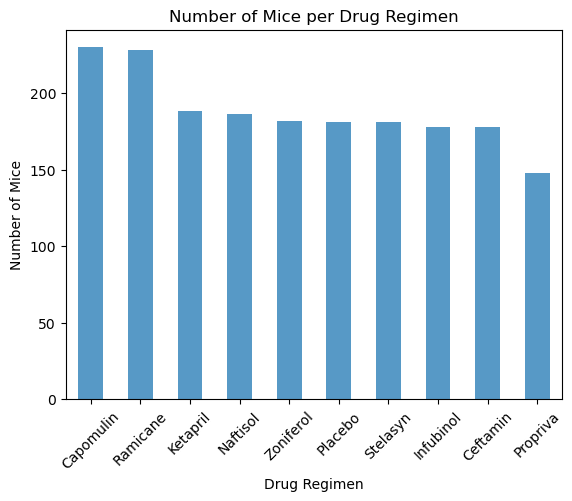

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_counts = mouse_study_df['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
mouse_counts.plot(kind='bar', alpha = 0.75)

# Set labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice per Drug Regimen')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

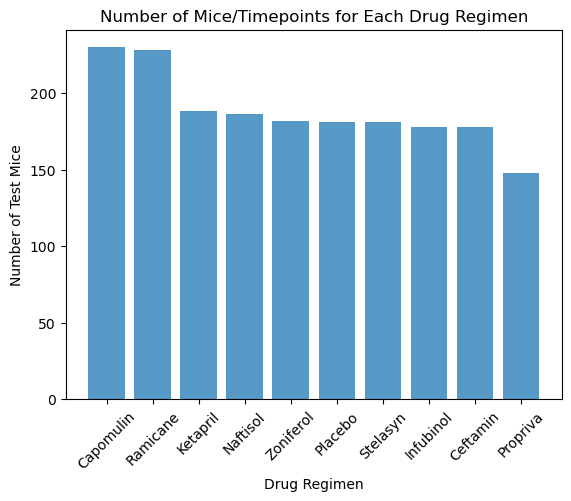

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

mouse_reg_counts = mouse_study_df['Drug Regimen'].value_counts()

# Get the unique drug regimens and their corresponding counts
drug_r = mouse_reg_counts.index
mouse_c = mouse_reg_counts.values

# Create a bar plot using pyplot
plt.bar(drug_r, mouse_c, alpha = 0.75)

# Set labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Test Mice')
plt.title('Number of Mice/Timepoints for Each Drug Regimen')
plt.xticks(rotation=45)

# Show the plot
plt.show()

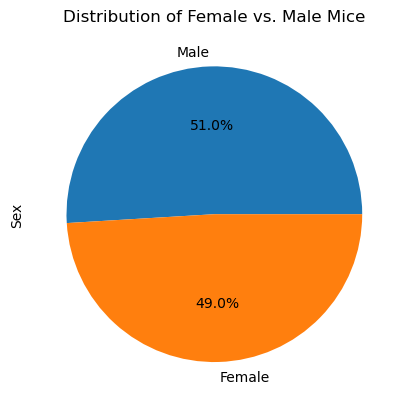

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mf_mix = mouse_study_df['Sex'].value_counts()

# Create a pie plot using Pandas
mf_mix.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Female vs. Male Mice', ylabel='Sex')

# Display the plot
plt.show()


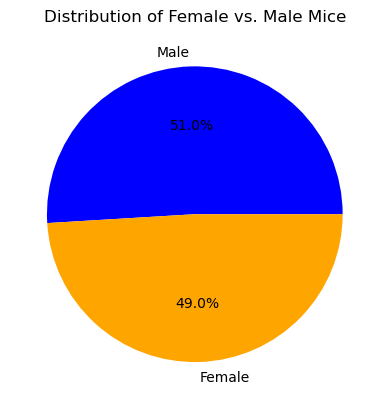

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_mix = mouse_study_df['Sex'].value_counts()

colors = ['blue' , 'orange']

plt.pie(mf_mix, labels=mf_mix.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Female vs. Male Mice')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_dr = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_df = mouse_study_df.loc[mouse_study_df['Drug Regimen'].isin(four_dr)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint_df, filtered_df, on=['Mouse ID', 'Timepoint'], how='inner')

In [14]:
# Set a variable equal to the list of treatments
treatments = four_dr

# Create empty list to fill with Tumor Volume data
tumor_volume_data = []

# Calculate the IQR and search for outliers
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Append data from Tumor Volume for each Drug Treatment to the blank variable created earlier
    tumor_volume_data.append(tumor_data)
    
    # Determine outliers using upper and lower bounds and other descriptive statistics
    quartiles = tumor_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    IQR = upper_q - lower_q
    mean_tumor = tumor_data.mean()
    std_tumor = tumor_data.std()
    
    # Determine the lower and upper bounds
    lower_bound = lower_q - 1.5 * IQR
    upper_bound = upper_q + 1.5 * IQR
    
    # Locate possible outliers for the current treatment
    possible_outliers = tumor_data.loc[(tumor_data < lower_bound) | (tumor_data > upper_bound)]
    
    # Print the results for potential outliers and provide descriptive statistics
    print(f"{treatment} Regimen\n")
    print(f"Average Tumor Volume(mm3) for {treatment} is: {round(mean_tumor,2)}")
    print(f"Standard Devation of  tumor volume(mm3) for {treatment} is: {round(std_tumor,2)}\n")
    print(f"If the Final Tumor Volume (mm3) of {treatment} is below {round(lower_bound,2)} it could be an outlier")
    print(f"If the Final Tumor Volume (mm3) of {treatment} is above {round(upper_bound,2)} it could be an outlier")
    print(f"The number of outliers for {treatment} is {possible_outliers.count()}\n")

Capomulin Regimen

Average Tumor Volume(mm3) for Capomulin is: 36.67
Standard Devation of  tumor volume(mm3) for Capomulin is: 5.72

If the Final Tumor Volume (mm3) of Capomulin is below 20.7 it could be an outlier
If the Final Tumor Volume (mm3) of Capomulin is above 51.83 it could be an outlier
The number of outliers for Capomulin is 0

Ramicane Regimen

Average Tumor Volume(mm3) for Ramicane is: 36.19
Standard Devation of  tumor volume(mm3) for Ramicane is: 5.67

If the Final Tumor Volume (mm3) of Ramicane is below 17.91 it could be an outlier
If the Final Tumor Volume (mm3) of Ramicane is above 54.31 it could be an outlier
The number of outliers for Ramicane is 0

Infubinol Regimen

Average Tumor Volume(mm3) for Infubinol is: 58.18
Standard Devation of  tumor volume(mm3) for Infubinol is: 8.6

If the Final Tumor Volume (mm3) of Infubinol is below 36.83 it could be an outlier
If the Final Tumor Volume (mm3) of Infubinol is above 82.74 it could be an outlier
The number of outliers fo

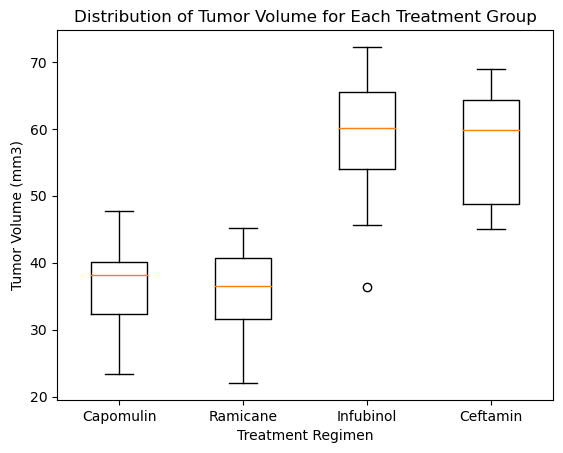

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a dictionary to store tumor volume data for each treatment group
tumor_volume_data = {}

# Loop through treatment regimens and collect the Tumor Volume data
for regimen in four_dr:
    tumor_volume_data[regimen] = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)']

# Create a list of tumor volume data for each treatment group
tvd_byg = [tumor_volume_data[regimen] for regimen in four_dr]

# Create a box plot with labels of each drug regimen
plt.boxplot(tvd_byg, labels=four_dr)

# Set labels and title
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

plt.show()

## Line and Scatter Plots

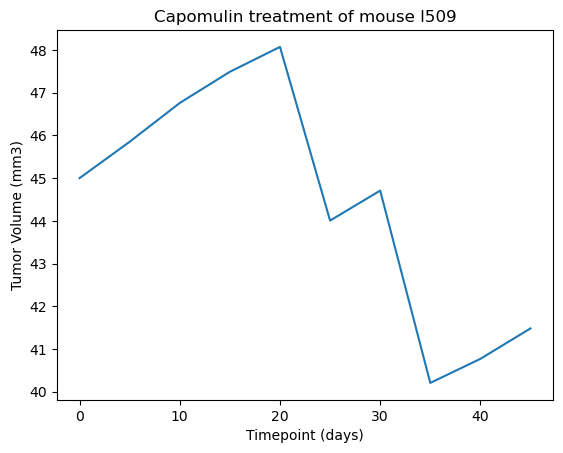

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

sample_mouse = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "l509",["Timepoint","Tumor Volume (mm3)"]]

# create variables for timepoints and tumor volume for the x and y axis
time = sample_mouse["Timepoint"]
tumor_size = sample_mouse["Tumor Volume (mm3)"]

# Create a line plot showing time and tumor volume for the selected mouse
plt.plot(time,tumor_size)

# display chart with axis labels and chart title
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.show()

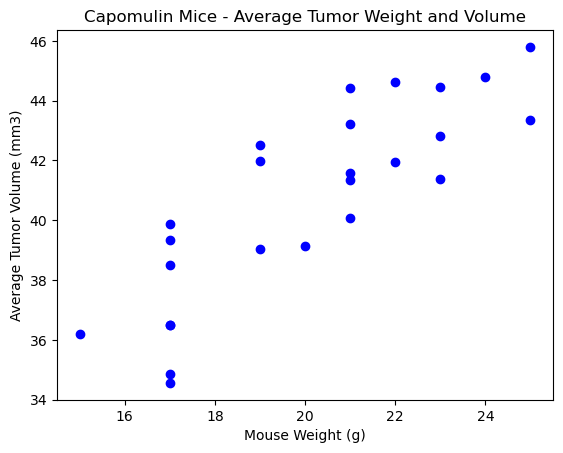

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_study_df[mouse_study_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and take the average volume of Tumors in the study and store it in a variable
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Group by Mouse ID and take the average volume of Mice in the study and store it in a variable
mouse_g = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot of mouse weight vs. average tumor volume
plt.scatter(mouse_g, avg_tumor_vol, marker='o', color='blue')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Mice - Average Tumor Weight and Volume')

# Show the plot
plt.show()

## Correlation and Regression

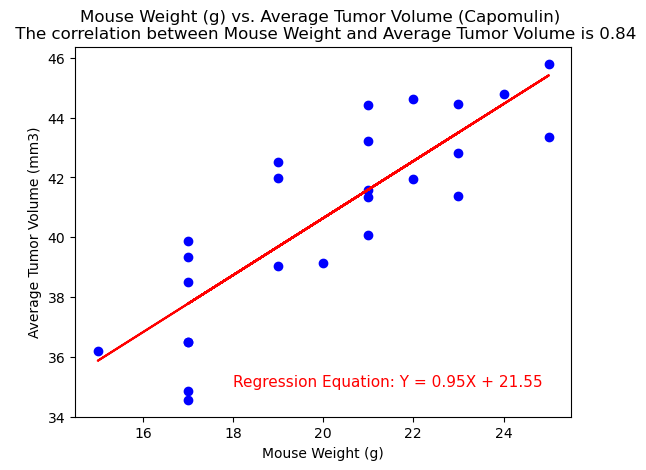

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_study_df[mouse_study_df['Drug Regimen'] == 'Capomulin']

# Take the average of tumor and mouse weight in two separate variables
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient 
correlation = (st.pearsonr(average_tumor_volume,mouse_weight)[0])
correlation = round(correlation, 2)

# Create a scatter plot of mouse weight vs. average tumor volume
plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='blue')

# Create the linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(mouse_weight, average_tumor_volume)

# Create the regression line (y=mx+b)
regress_values = slope * mouse_weight + intercept
plt.plot(mouse_weight, regress_values, color='red')

# Set labels and title, include the correlation coefficient and regression equation
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title(f'Mouse Weight (g) vs. Average Tumor Volume (Capomulin) \n The correlation between Mouse Weight and Average Tumor Volume is {correlation}')

equation_text = f"Regression Equation: Y = {round(slope, 2)}X + {round(intercept, 2)}"
plt.annotate(equation_text,(18,35), fontsize=11, color="red")

# Show the plot
plt.show()